In [ ]:
# pip install citipy

In [1]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [3]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(611)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=150)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=150)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

105
['collie', 'blackmans bay', 'lompoc', 'san patricio', 'lihue', 'papatowai', 'port elizabeth', 'lebu', 'dali', 'adamstown', 'brookings', 'ushuaia', 'port-aux-francais', 'pudozh', 'bethel', 'south venice', 'afaahiti', 'susuman', 'ewo', 'waitangi', 'edinburgh of the seven seas', 'mae hong son', 'pacasmayo', 'jatoba', 'margaret river', 'kodiak', 'thunder bay', 'constantia', 'yellowknife', 'tolanaro', 'isafjordur', 'golden beach', 'port shepstone', 'kourou', 'kavaratti', 'kailua-kona', 'nantucket', 'ust-nera', 'grytviken', 'kabalo', 'rong kwang', 'manicore', 'urzhar', 'kuala belait', 'butte', 'cargados carajos', 'yuzhno-kurilsk', 'bilibino', 'la grande', 'olinda', 'saudarkrokur', 'puerto natales', 'punta arenas', 'kirensk', 'magadan', 'malabar', 'abu al matamir', 'ambato boeny', 'mammoth lakes', 'montevideo', 'tazovsky', 'reggane', 'lospalos', 'palopo', 'hun', 'kusel', 'nemuro', 'ribeira grande', 'puerto ayora', 'invercargill', 'batticaloa', 'el fahs', 'bredasdorp', 'island harbour', 'm

In [5]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize list
city_data = []

# Create counters
record_count = 1
set_count = 1

# Loop through all cities
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Build url to send request
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Increment count
    record_count += 1

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | collie
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | dali
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | brookings
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | pudozh
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | south venice
Processing Record 17 of Set 1 | afaahiti
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | ewo
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | mae hong son
Processing Record 23 of Set 1 | pacasmayo
Processing Record 24 of Set 1 | jatob

In [7]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          103
Lat           103
Lng           103
Max Temp      103
Humidity      103
Cloudiness    103
Wind Speed    103
Country       103
Date          103
dtype: int64


In [9]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,collie,-33.3667,116.1500,32.27,35,0,2.69,AU,1733967209
1,blackmans bay,-43.0167,147.3167,18.18,61,100,0.89,AU,1733967210
2,lompoc,34.6391,-120.4579,14.45,63,0,2.57,US,1733967211
3,san patricio,28.0170,-97.5169,10.97,36,0,3.91,US,1733967212
4,lihue,21.9789,-159.3672,25.77,73,75,7.72,US,1733967213


In [11]:
# Export to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [13]:
# Read back data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,collie,-33.3667,116.1500,32.27,35,0,2.69,AU,1733967209
1,blackmans bay,-43.0167,147.3167,18.18,61,100,0.89,AU,1733967210
2,lompoc,34.6391,-120.4579,14.45,63,0,2.57,US,1733967211
3,san patricio,28.0170,-97.5169,10.97,36,0,3.91,US,1733967212
4,lihue,21.9789,-159.3672,25.77,73,75,7.72,US,1733967213


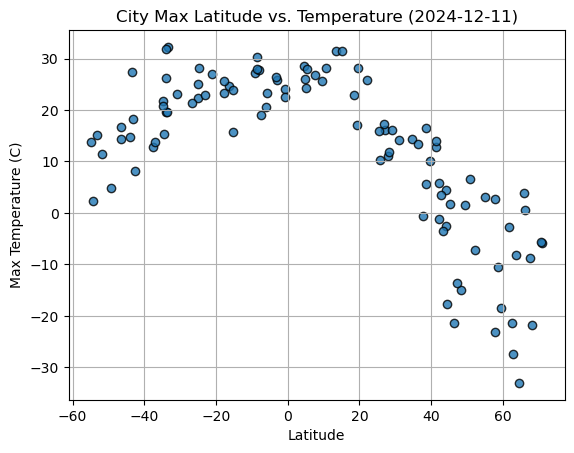

In [15]:
# Associate Latitude and temperature

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save 
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

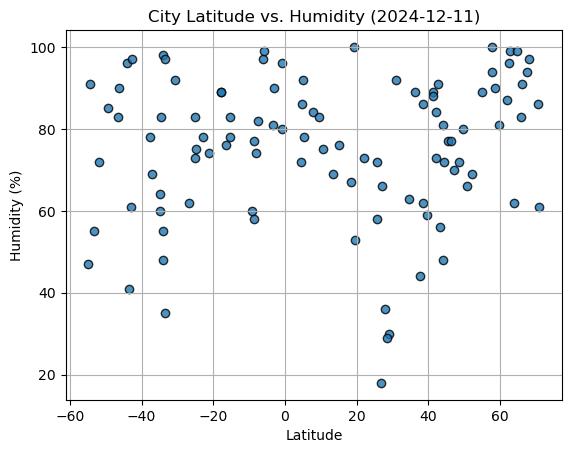

In [17]:
# Associate Latitude and humidity

plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

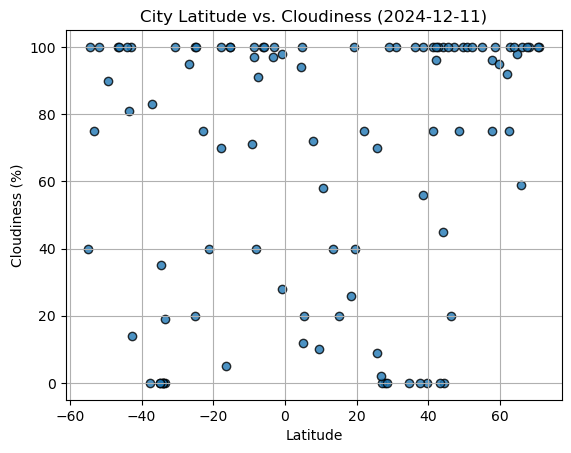

In [19]:
# Associate Latitude and cloudiness

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save 
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

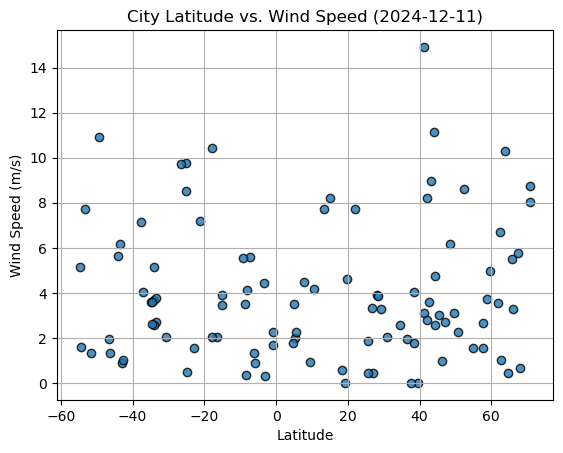

In [21]:
# Associate Latitude and wind speed

plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Augment
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

In [23]:
# Regression analysis for each of the pairs above.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [25]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lompoc,34.6391,-120.4579,14.45,63,0,2.57,US,1733967211
3,san patricio,28.0170,-97.5169,10.97,36,0,3.91,US,1733967212
4,lihue,21.9789,-159.3672,25.77,73,75,7.72,US,1733967213
8,dali,25.7000,100.1833,10.23,58,9,1.85,CN,1733967217
10,brookings,44.3114,-96.7984,-17.75,72,0,2.57,US,1733967219


In [27]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,collie,-33.3667,116.1500,32.27,35,0,2.69,AU,1733967209
1,blackmans bay,-43.0167,147.3167,18.18,61,100,0.89,AU,1733967210
5,papatowai,-46.5619,169.4708,14.39,83,100,1.93,NZ,1733967214
6,port elizabeth,-33.9180,25.5701,19.62,98,0,2.57,ZA,1733967215
7,lebu,-37.6167,-73.6500,12.89,78,0,7.15,CL,1733967216


The r-value is: 0.7171620238981407


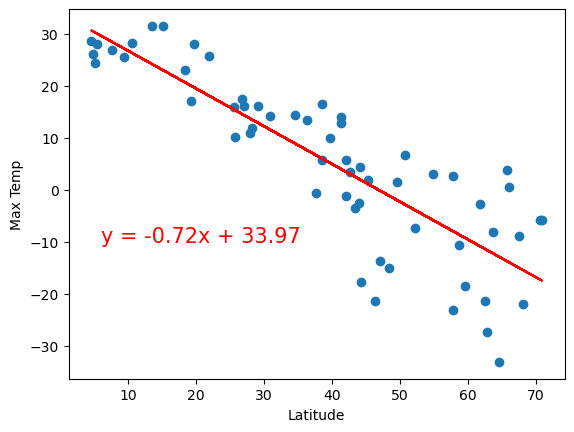

In [29]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,-10))

The r-value is: 0.38685743706119935


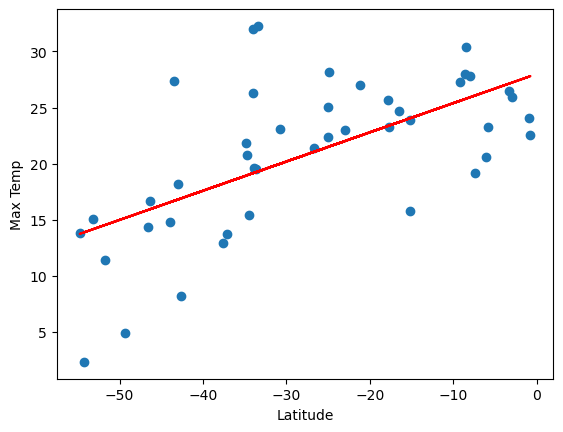

In [61]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

### Northern Hemisphere: Temperature vs. Latitude

- The negative slope (−0.72) indicates that maximum temperature decreases as latitude increases in the Northern Hemisphere.
- Strong negative correlation (r = -0.717): Latitude is a good predictor of temperature in this region.
- As we move away from the equator (higher latitudes), temperatures tend to drop significantly.
- The strong correlation suggests that latitude has a significant effect on maximum temperature in the Northern Hemisphere.

### Sothern Hemisphere: Temperature vs. Latitude
- The positive slope (0.39) indicates that maximum temperature increases as latitude increases in the Southern Hemisphere.
- Weak correlation (r = 0.387): Latitude has a moderate effect on maximum temperature in this region.
- Temperatures generally increase as we move toward the equator (higher latitudes in the Southern Hemisphere).
- However, the weaker correlation suggests other factors (e.g., altitude, ocean currents) may also play a significant role in determining temperature.

The r-value is: 0.07593331791677632


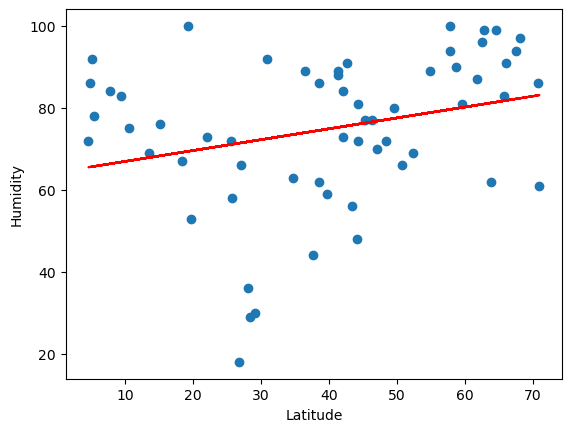

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.062382751824155536


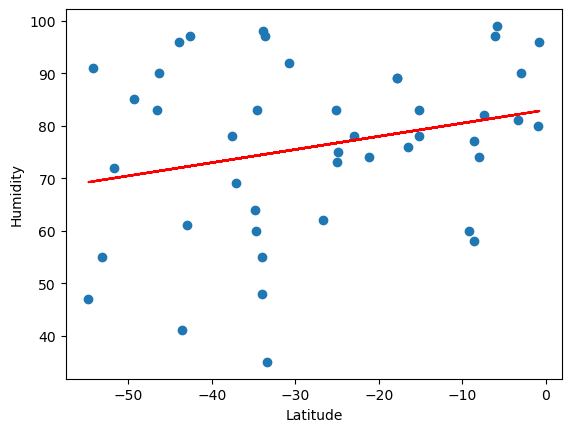

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

### Northern Hemisphere: Humidity vs. Latitude

- Regression equation: 𝑦=0.17𝑥+69.71
- R-value (correlation coefficient):r=0.076
- The slope (0.17) indicates a weak positive relationship between latitude and humidity in the Northern Hemisphere.
- The R-value (close to 0) suggests a very weak correlation, meaning latitude has little to no predictive power for humidity in this region.
- Humidity does not vary significantly with latitude in the Northern Hemisphere.
- Factors like proximity to water bodies, weather systems, and local climate likely have a more significant impact on humidity.

### Southern Hemisphere: Humidity vs. Latitude
- Regression equation:y=0.12x+74.97
- R-value (correlation coefficient):r=0.062
- The slope (0.12) indicates a weak positive relationship between latitude and humidity in the Southern Hemisphere.
- The R-value (close to 0) suggests a very weak correlation, similar to the Northern Hemisphere.
- Humidity in the Southern Hemisphere also shows little to no dependence on latitude.
- Regional climatic influences, such as ocean currents and weather patterns, likely explain most of the variation in humidity.

The r-value is: 0.21206285672049321


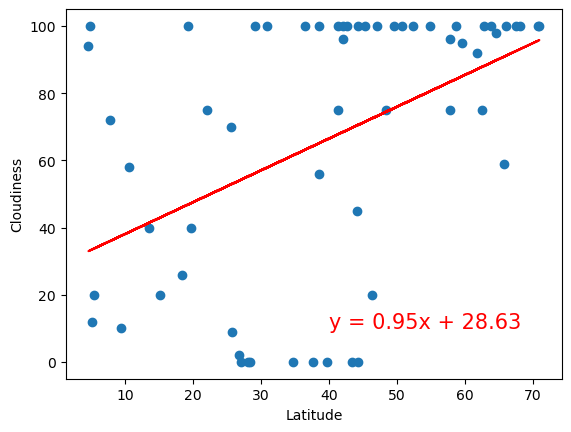

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.026550070775155383


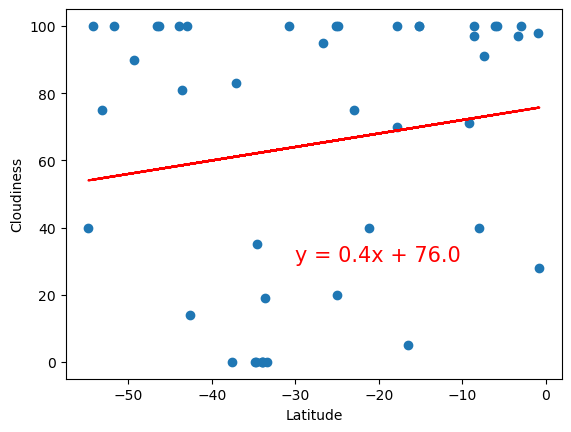

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

### Northern Hemisphere: Cloudiness vs. Latitude
- The slope (0.95) indicates a weak positive relationship between latitude and cloudiness in the Northern Hemisphere.
- The R-value suggests a weak correlation; latitude does not strongly predict cloudiness.
- While there is a slight increase in cloudiness with latitude, this trend is weak and may not be statistically significant.
- Other factors like geographical location, local weather systems, or seasonal effects might play a larger role in cloudiness patterns.

### Southern Hemisphere: Cloudiness vs. Latitude
- The slope (0.4) indicates a very weak positive relationship between latitude and cloudiness in the Southern Hemisphere.
- The R-value (close to 0) suggests no meaningful correlation between latitude and cloudiness.
- Cloudiness in the Southern Hemisphere is largely independent of latitude.
- External factors (e.g., oceanic influences, proximity to landmasses) likely dominate cloudiness variations.

The r-value is: 0.03299850147395923


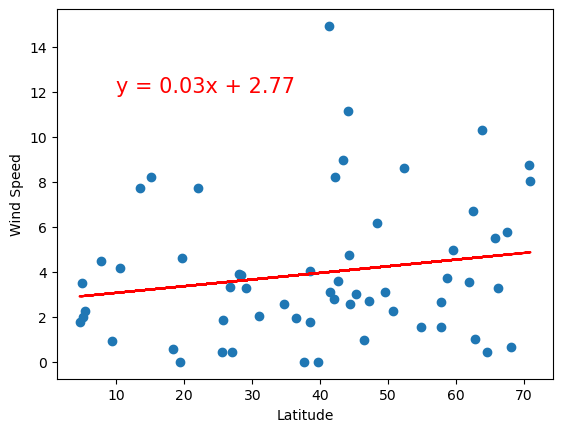

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.023421583433591204


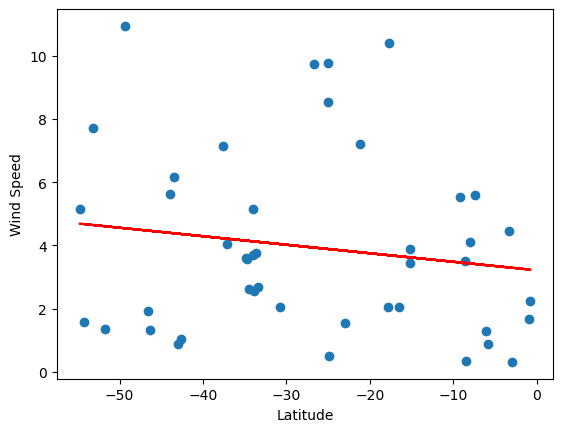

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,12))

### Northern Hemisphere: Wind Speed vs. Latitude
- The slope (0.03) indicates a very weak positive relationship between latitude and wind speed in the Northern Hemisphere.
- The R-value, close to 0, indicates little to no correlation between latitude and wind speed.
- Latitude has almost no predictive power for wind speed in the Northern Hemisphere.
- Wind speed is likely influenced by other factors, such as local weather systems, altitude, or geographical features.

### Southern Hemisphere: Wind Speed vs. Latitude
- Regression equation: y=−0.02x+3.89
- R-value (correlation coefficient): r=−0.023
- The slope (−0.02) suggests a very weak negative relationship between latitude and wind speed in the Southern Hemisphere.
- The R-value, close to 0, indicates an almost nonexistent correlation between latitude and wind speed.
- Similar to the Northern Hemisphere, wind speed in the Southern Hemisphere is largely unaffected by latitude.
- Other environmental factors, such as ocean currents or seasonal influences, may play a more significant role.
